# Summary
Suppose that the graph has $d$ nodes and for each node, we $N$ observations. Denote by $x_s=(x_{s,1},\dots, x_{s,d})$ the vector of the $s^{\textit{th}}$ observation of all the nodes. All the vectors are assumed to be column vectors.


1. Choose a tolerance $\epsilon$, choose a kernel $\kappa$. Each input of $\kappa$ is $d$ dimensional.
2. Formulate a gram matrix $K$ such that $K_{ij}=\kappa(x_i, x_j)$. Thus, $K$ is a $N\times N$ matrix.
3. Compute the eigen-decomposition of $K$. Denote by the eigenvalues of $K$ by $(\lambda_i)_{i=1}^N$ such that $\lambda_1\geq \lambda_2 \geq ... \geq \lambda_N$. Let the corresponding eigenvectors be $(\alpha_i)_{i=1}^N$. Normalize $\alpha_i$ such that $|\alpha_i|^2=\frac{1}{N\lambda_i}$.
4. Choose $r$ such that $r=\min\{n|\lambda_{n+1}/\lambda_1 \leq \epsilon\}$.
5. Let the RKHS associated with $\kappa$ by $\mathcal{H}$. Solve the minimization problem
$$
\begin{align*}
\min_{f\in \mathcal{H}}& \frac{1}{2}\|f\|_{\mathcal{H}}^2+\frac{1}{\gamma}\sum_{i=1}^r\lambda_i\bigg|\sum_{s=1}^N\alpha_{i, s}f(x_s)\bigg|^2, \\
\text{s.t. }& [\boldsymbol{\phi}, f]=\boldsymbol{y}.
\end{align*}\qquad (1)
$$
6. Since $f=\Psi v$, $f$ can be viewed as an implicit function of all the nodes. For the above minimization problem, we have the following representer formula:
$$
f(x)=\kappa(x, \boldsymbol{\varphi})\kappa(\boldsymbol{\varphi}, \boldsymbol{\varphi})^{-1}\boldsymbol{z},
$$
where $\boldsymbol{\varphi}=[\delta_{x_1},\dots, \delta_{x_N}, \boldsymbol{\phi}]$ and $\boldsymbol{z}$ solves
$$
\begin{align*}
\min_{\boldsymbol{z}}&\frac{1}{2}\boldsymbol{z}^T\kappa(\boldsymbol{\varphi}, \boldsymbol{\varphi})^{-1}\boldsymbol{z}+\frac{1}{\gamma}\sum_{i=1}^r\lambda_i\bigg|\sum_{s=1}^N\alpha_{i,s}z_s^{(1)}\bigg|^2,\\
\text{s.t. }& z^{(2)}=\boldsymbol{y}.
\end{align*} \qquad (2)
$$
We note that $(2)$ can be solved explicitly.


Alternatively, we can use the mode decomposition.Let $\kappa = \sum_{j=1}^k\kappa_j$. Thus, $f\in \mathcal{H}$ can be expressed as $f=\sum_{j=1}^kf_j$, where $f_j\in \mathcal{H}_j$ and $\|f\|_{\mathcal{H}}^2=\sum_{j=1}^k\|f\|_{\mathcal{H}_j}^2$.

For example, let $\kappa(x, x')=1+x^Tx'+\gamma_2\sum_{ij}^dx_ix_jx'_ix'_j+\gamma_3\prod_{j}^d(1+\kappa_j(x_j, x_j'))$. Then, $f$ has the following form
$$
f=\beta_0 + \sum_{i=1}^d\beta_ix_i+\sum_{i,j=1}^d\beta_{ij}x_ix_j+f_3.
$$
Then,
$$
\|f\|_{\mathcal{H}}^2=\beta_0^2+\sum_{i=1}^d\beta_i^2+\frac{1}{\gamma_2}\sum_{ij}\beta_{ij}^2+\frac{1}{\gamma_3}\|f_3\|_{\Gamma_3}^2.
$$

# Procedures
1. Using the method discussed before (test the energy of other nodes against noise) to determine whether Node $i$ should be function of other nodes or not. If yes, we proceed to determine the ancestors of Node $i$.
2. For each Node $i$, set the constraints in (1) such that Node $i$ is the function of other nodes and solve (1). Denote the loss by $l_i$.
3. We determine the ancestors of $i$. We add extra constraints such that a potential ancestor Node $h$ is not an ancestor of Node $i$ and resolve (1). Denote by $l_{ih}$ the loss. If $l_{ih} - l_i < \tau l_i$, where $\tau$ is the tolerance, Node $h$ can be removed. Otherwise, Node $h$ can be kept. We continue to examine the next potential ancestor.

# Minimization Problems

## First-step Minimization Problem
Thus, for the 1st step, we solve the following minimization problem
$$
\begin{align*}
\min\beta_0^2+\sum_{j=1,j\not=i}^d\beta_j^2+\frac{1}{\gamma_2}\sum_{jk,j\not=i, k\not=i}\beta_{jk}^2+\frac{1}{\gamma_3}\|f_3^{-i}\|_{\Gamma_3^{-i}}^2+\frac{1}{\gamma}\sum_{t=1}^r\lambda_t\bigg|\sum_{s=1}^N\alpha_{t,s}\big(\beta_0+\sum_{j=1,j\not=i}\beta_jx_j^s+x_i^s+\sum_{jk,j\not=i,k\not=i}\beta_{jk}x_j^sx_k^s+f_3^{-i}(x_s)\big)\bigg|^2,
\end{align*}
$$
which is equivalent to
$$
\begin{align*}
\min\beta_0^2+\sum_{j=1,j\not=i}^d\beta_j^2+\frac{1}{\gamma_2}\sum_{jk,j\not=i, k\not=i}\beta_{jk}^2+\frac{1}{\gamma_3}\boldsymbol{z}^T\Gamma_{3,-i}^{-1}\boldsymbol{z}+\frac{1}{\gamma}\sum_{t=1}^r\lambda_t\bigg|\sum_{s=1}^N\alpha_{t,s}\big(\beta_0+\sum_{j=1,j\not=i}\beta_jx_j^s+x_i^s+\sum_{jk,j\not=i,k\not=i}\beta_{jk}x_j^sx_k^s+z_s\big)\bigg|^2.
\end{align*} (3)
$$

## Second-step Minimization Problem
For the 2nd step, we solve the following minimization problem
$$
\begin{align*}
\min\beta_0^2+\sum_{j=1,j\not=i,h}^d\beta_j^2+\frac{1}{\gamma_2}\sum_{jk,j\not=i,h, k\not=i,h}\beta_{jk}^2+\frac{1}{\gamma_3}\|f_3^{-i,-h}\|_{\Gamma_3^{-i,-h}}^2+\frac{1}{\gamma}\sum_{t=1}^r\lambda_t\bigg|\sum_{s=1}^N\alpha_{t,s}\big(\beta_0+\sum_{j=1,j\not=i,h}\beta_jx_j^s+x_i^s+\sum_{jk,j\not=i,h,k\not=i,h}\beta_{jk}x_j^sx_k^s+f_3^{-i,-h}(x_s)\big)\bigg|^2,
\end{align*}
$$
which is equivalent to
$$
\begin{align*}
\min\beta_0^2+\sum_{j=1,j\not=i,h}^d\beta_j^2+\frac{1}{\gamma_2}\sum_{jk,j\not=i,h, k\not=i,h}\beta_{jk}^2+\frac{1}{\gamma_3}\boldsymbol{z}^T\Gamma_{3,-i,-h}^{-1}\boldsymbol{z}+\frac{1}{\gamma}\sum_{t=1}^r\lambda_t\bigg|\sum_{s=1}^N\alpha_{t,s}\big(\beta_0+\sum_{j=1,j\not=i,h}\beta_jx_j^s+x_i^s+\sum_{jk,j\not=i,h,k\not=i,h}\beta_{jk}x_j^sx_k^s+z_s\big)\bigg|^2.
\end{align*} (4)
$$

Questions:
1. If we do not add any constraints, the solution of (1) is $0$;
2. Scipy.optimize.minimize does not solve (3) well;
3. Now we use jax to compute the Hessian and the Jacobian of the optimization problem and solve the linear system. But the Hessian is ill-conditioned. We cannot solve the linear system correctly.


In [1]:
import jax
import numpy as onp
import jax.numpy as np
from jax import jit, vmap
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as t
from ipywidgets import interact
from jax import grad
from jax.scipy.optimize import minimize
from jax.config import config
config.update("jax_enable_x64", True)
from jax.scipy.linalg import cho_factor, cho_solve
from functools import reduce
#from jax.scipy.optimize import minimize
#from jaxopt import ProjectedGradient
#from jaxopt.projection import projection_box

In [2]:
x1s = np.linspace(-2, 2, 500)
x2s = x1s**2 + 1 + onp.random.random(size = len(x1s))*1e-1

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Examining Node x0
	 Node x0, E_Signal = 2.6594, E_Noise = 6684.4308
	 Node x0 does not have any ancestors
 
Examining Node x1
	 Node x1, E_Signal = 28.6130, E_Noise = 6.1441
	 Node x1 have ancestors
Energy of Node x1 is 0.0002102145531189415
 


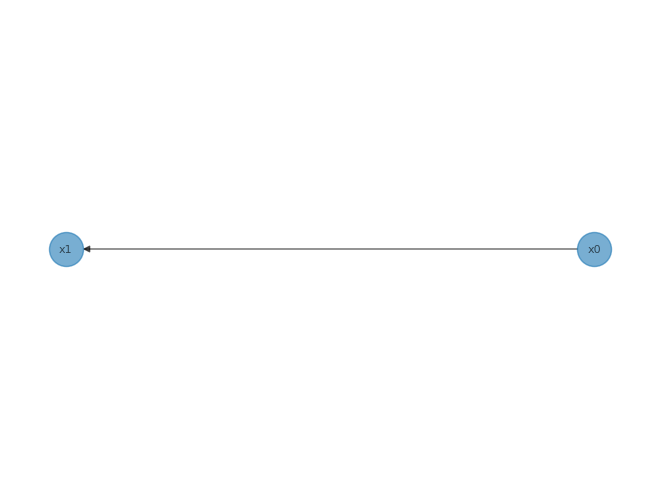

In [3]:
from KPCA import *
from kernels import matern_five_halfs as k

ks = [k]*2
kpca = KPCA()

X = np.array([x1s, x2s])
kpca.build_graph(X, ks, gamma=1e-10, gamma2=1, gamma3=1, epsilon=1e-10, tau1=0.5, tau2=0.5, names=['x0', 'x1'], noise_scale = 0.1, verbose=True, plot=True)

Examining Node x0
	 Node x0, E_Signal = 128.0719, E_Noise = 998.4795
	 Node x0 does not have any ancestors
 
Examining Node x1
	 Node x1, E_Signal = 13.5387, E_Noise = 0.2461
	 Node x1 have ancestors
Energy of Node x1 is 7.265635861140894e-09
Energy of Node x1 after eliminating Node x0 is 9.51186526585263e-07
The ratio is 129.91579935522697
Energy of Node x1 after eliminating Node x2 is 4.503300670008992e-06
The ratio is 618.8081979437181
 
Examining Node x2
	 Node x2, E_Signal = 224.0500, E_Noise = 13.5021
	 Node x2 have ancestors
Energy of Node x2 is 2.3661028737774756e-07
Energy of Node x2 after eliminating Node x0 is 0.00041426546557559205
The ratio is 1749.834548094769
Energy of Node x2 after eliminating Node x1 is 6.29809998011225e-05
The ratio is 265.18031066660063
 


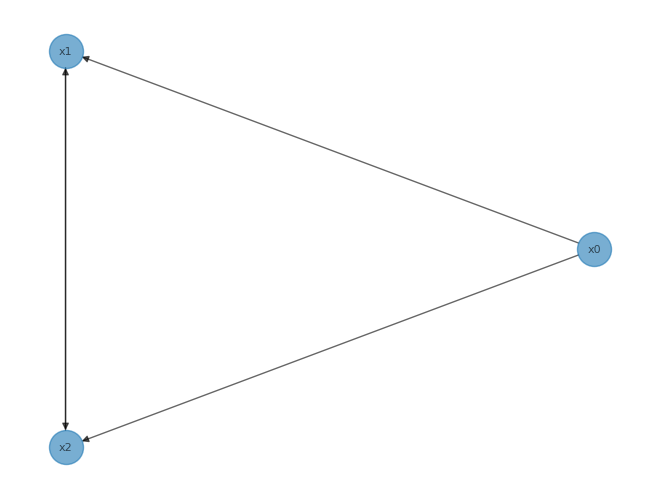

In [4]:
#What we expect to recover is X1-> X2 -> X3
ks = [k]*3
x0s = np.linspace(-2, 2, 100)
x1s = x0s**2 + 1 + onp.random.random(size = len(x0s))*1e-1
x2s = x1s**2 - 1 + onp.random.random(size = len(x0s))*1e-1

X = np.array([x0s, x1s, x2s])
kpca.build_graph(X, ks, gamma=1e-10, gamma2=1, gamma3=1, epsilon=1e-10, tau1=0.5, tau2=0.5, names=['x0', 'x1', 'x2'], verbose=True, plot=True)

Examining Node x1
	 Node x1, E_Signal = 39.1059, E_Noise = 373.3893
	 Node x1 does not have any ancestors
 
Examining Node x2
	 Node x2, E_Signal = 4.5499, E_Noise = 12.1045
	 Node x2 does not have any ancestors
 
Examining Node x3
	 Node x3, E_Signal = 32.9676, E_Noise = 13.3978
	 Node x3 have ancestors
Energy of Node x3 is 9.186202881054962e-05
Energy of Node x3 after eliminating Node x1 is 0.002559825990739186
The ratio is 26.86598580375802
Energy of Node x3 after eliminating Node x2 is 0.0017816983093789072
The ratio is 18.395372957126476
 


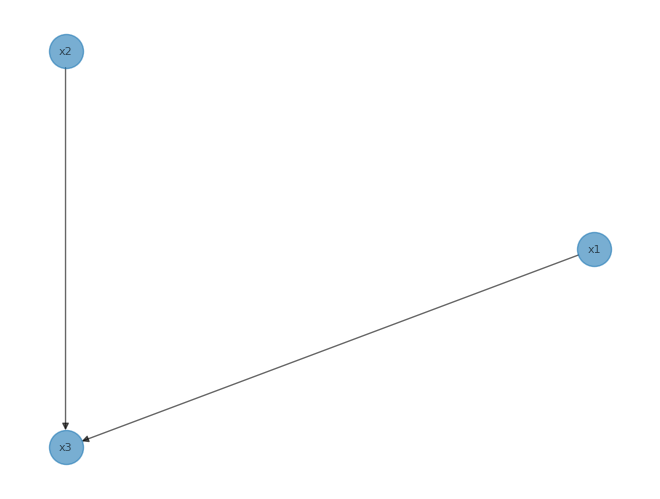

In [5]:
x0s = np.linspace(-2, 2, 100)
onp.random.seed(0)
x1s = onp.random.random(100)
x2s = (x0s + x1s)**2 + onp.random.normal(size = len(x1s))*1e-1
X = np.array([x0s, x1s, x2s])

kpca.build_graph(X, ks, gamma=1e-8, gamma2=1, gamma3=1, epsilon=1e-8, tau1=0.5, tau2=0.5, names=['x1', 'x2', 'x3'], noise_scale=1e-1, verbose=True, plot=True)

Examining Node x1
	 Node x1, E_Signal = 9.4622, E_Noise = 0.6464
	 Node x1 have ancestors
Energy of Node x1 is 2.772471796190154e-06
Energy of Node x1 after eliminating Node x2 is 7.183984608836323e-05
The ratio is 24.911840180694842
Energy of Node x1 after eliminating Node x3 is 6.284784450232102e-05
The ratio is 21.668524379106255
 
Examining Node x2
	 Node x2, E_Signal = 15.7836, E_Noise = 3.5674
	 Node x2 have ancestors
Energy of Node x2 is 3.1933811482947645e-05
Energy of Node x2 after eliminating Node x1 is 0.0006243582616915076
The ratio is 18.551636109109904
Energy of Node x2 after eliminating Node x3 is 0.0017892025541976179
The ratio is 55.02846860773369
 
Examining Node x3
	 Node x3, E_Signal = 1406.9516, E_Noise = 137.3774
	 Node x3 have ancestors
Energy of Node x3 is 1.7485834495705684e-05
Energy of Node x3 after eliminating Node x1 is 0.004945721062227704
The ratio is 281.84158033420226
Energy of Node x3 after eliminating Node x2 is 0.00043844044151058483
The ratio is 24.

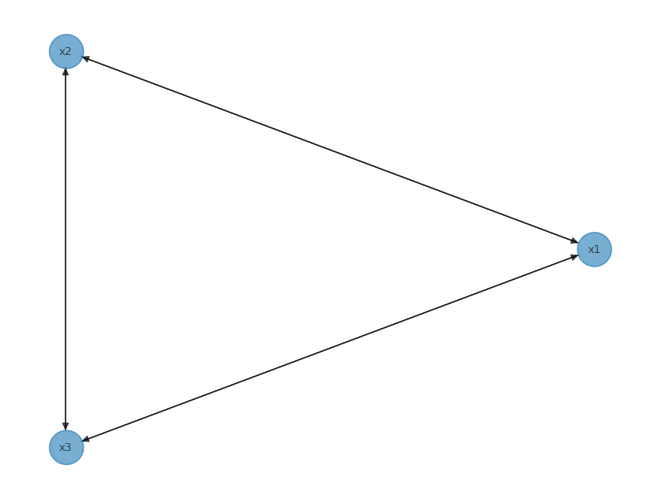

In [7]:
#It seems that this one has a problem

x1s = np.linspace(-2,2,100)
x2s = x1s**2 + 1 + onp.random.normal(size = 100)*1e-1
x3s = (x1s + 2)**3 + onp.random.normal(size = 100)*1e-1
X = np.array([x1s, x2s, x3s])
kpca.build_graph(X, ks, gamma=1e-8, gamma2=1e-2, gamma3=1e-4, epsilon=1e-8, tau1=0.5, tau2=0.5, names=['x1', 'x2', 'x3'], noise_scale=1e-1, verbose=True, plot=True)